**Data Set: Boston House Prices**

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price). https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

# Importing libraries & loading the Dataset

In [1]:
# Import Essential Libraries
import pandas as pd
import numpy as np

# to visualize data using 2D plots.
import matplotlib.pyplot as plt
# to make 2D plots look pretty and readable.
import seaborn as sns
import random
import os

# Setting Seaborn Style
sns.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Preformance metrics
from sklearn.metrics import mean_squared_error, r2_score

# ignore all warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#To create machine learning models easily and make predictions.
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
#There are 6 keys in this dataset using which we can access more information about the dataset .
print("[INFO] keys : {}".format(dataset.keys()))

[INFO] keys : dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [4]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print("[INFO] dataset summary", dataset.DESCR)

[INFO] dataset summary .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,00

# Exploratory Data Analysis

In [6]:
# We can easily convert the dataset into a pandas dataframe to perform exploratory data analysis. 
df=pd.DataFrame(dataset.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df.columns = dataset.feature_names
df["prices"]=dataset.target

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Exploratory  Data Analysis is a very important step before training the model. Here,  we will use visualizations to understand the relationship of the target  variable with other features.

Let’s first plot the distribution of the target variable. We will use the histogram plot function from the matplotlib library.

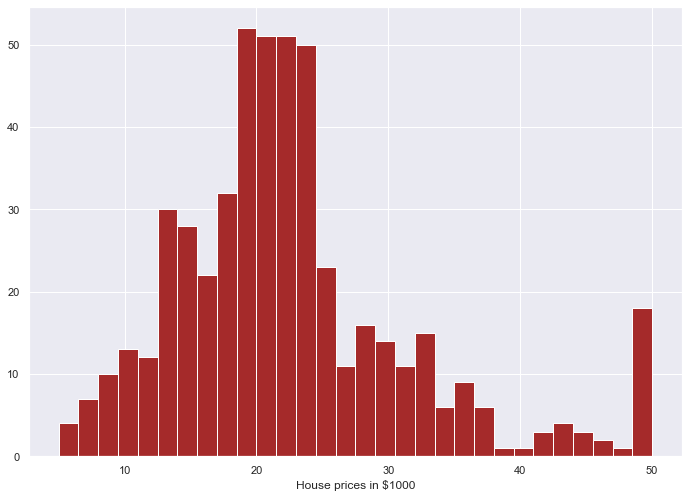

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['prices'],color ="brown", bins=30)
plt.xlabel("House prices in $1000")
plt.show()

We can see from the plot that the values of PRICE are distributed normally with few outliers. Most of the house are around 20–24 range (in $1000 scale)

In [10]:
#descriptive statistics
#statistical summary of the dataset using the describe() function. Using this function,
#we can understand the count, min, max, mean and standard deviation for each attribute (column) in the dataset. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Understanding the Data and statistical analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  prices   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
prices     229
dtype: int64

## Check for missing values

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
prices     0
dtype: int64

In [14]:
print(df.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
prices     0
dtype: int64


# Data Visualization

## Checking the distribution of the data

In [15]:
def draw_plots(df, var, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, f in enumerate(var):
        ax=fig.add_subplot(rows,cols,i+1)
        df[f].hist(bins=20,ax=ax, facecolor='midnightblue')
        ax.set_title(f+'Distribution',color='DarkRed')
 
    fig.tight_layout() 

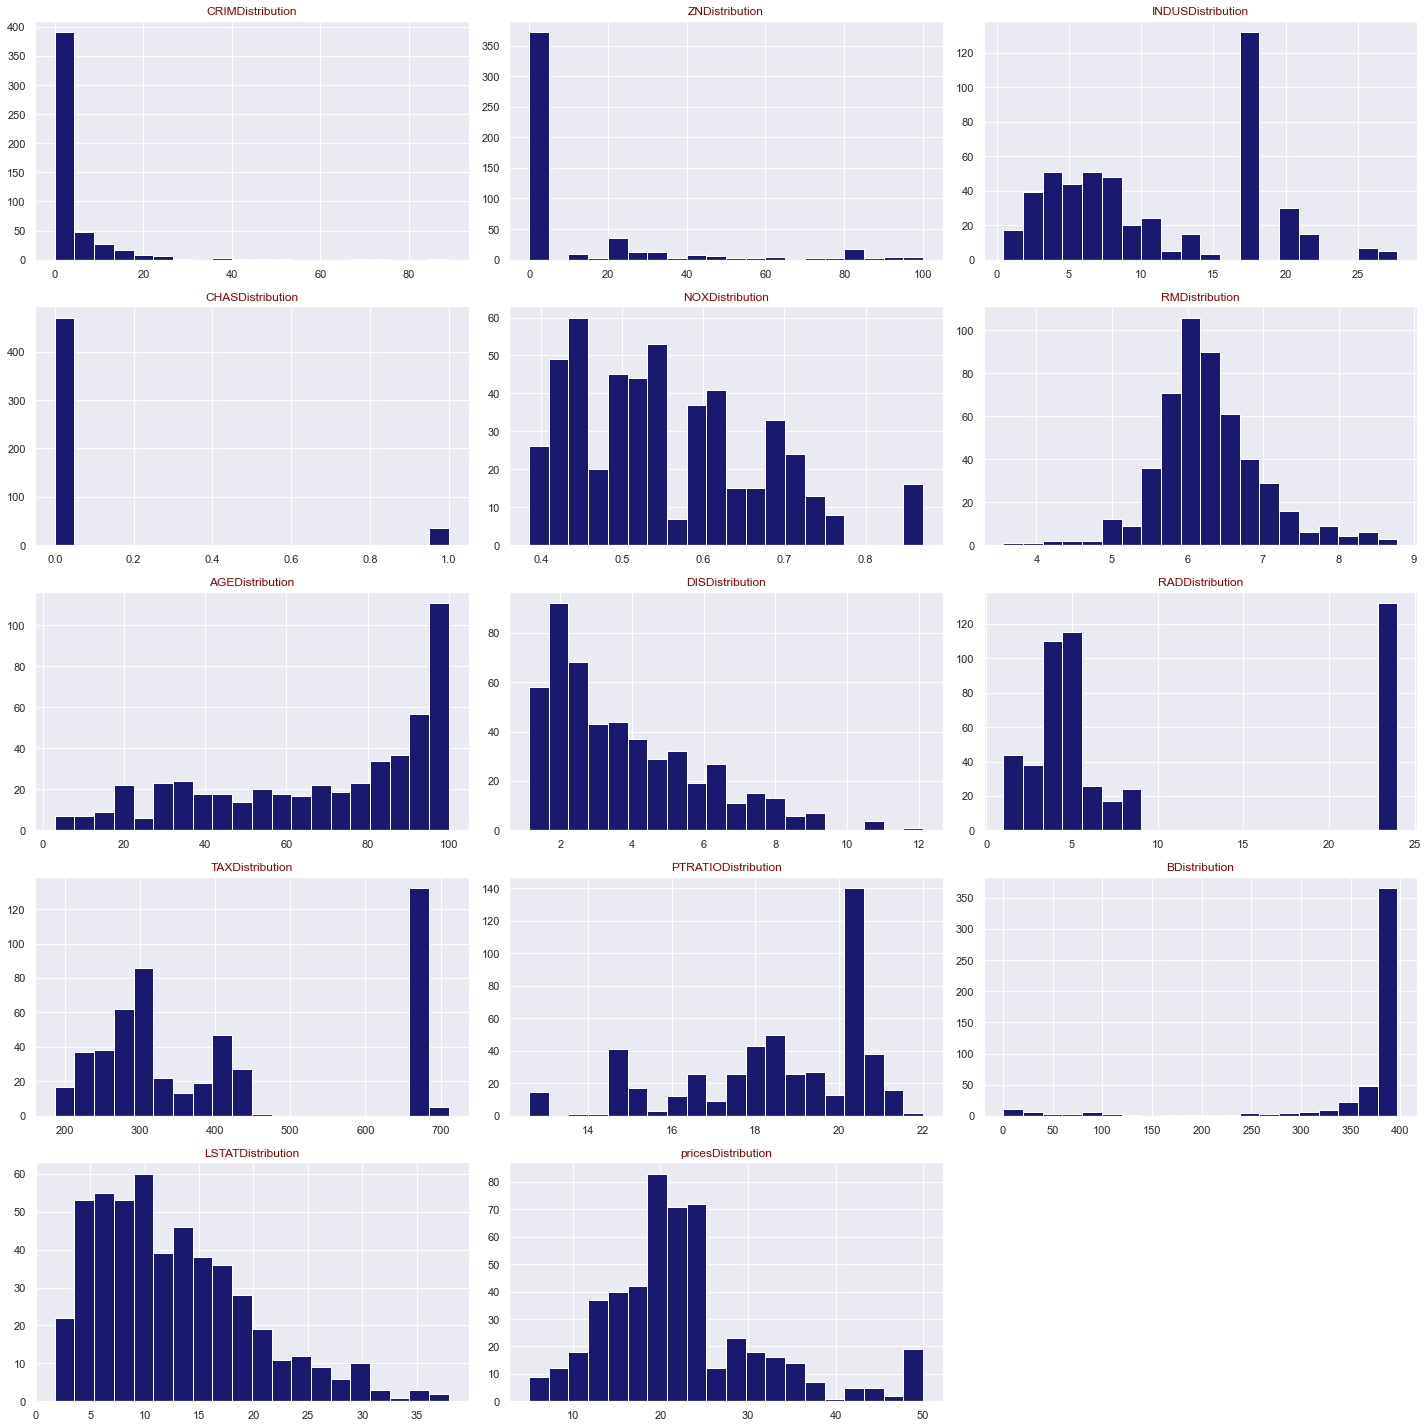

In [16]:
plt.show()
draw_plots(df,df.columns,5,3)

## Explorning data to know relation before processing

<b> The correlation coefficient ranges from -1 to 1. If the value is close  to 1, it means that there is a strong positive correlation between the  two variables. When it is close to -1, the variables have a strong  negative correlation.

In [17]:
# Finding out the correlation between the features
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

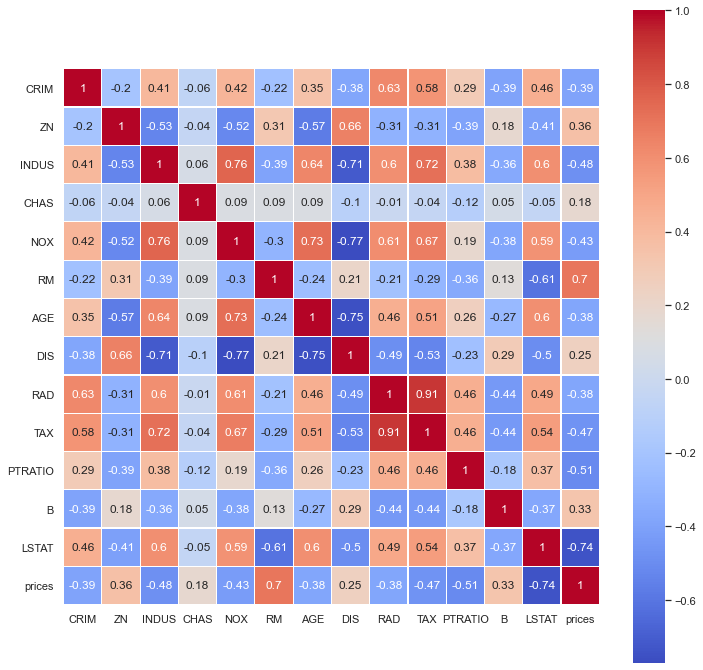

In [18]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

The Big colorful picture above which is called Heatmap helps us to understand how features are correlated to each other.

Postive sign implies postive correlation between two features whereas Negative sign implies negative correlation between two features.  
I am here interested to know which features have good correlation with our dependent variable prices and can help in having good predictions.  
I observed that INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with prices and I am interested to know more about them.  
However I noticed that INDUS shows good correlation with TAX and LSAT which is a pain point for us :(

because it leads to Multicollinearity. So I decided NOT to consider this feature and do further analysis with other 6 remaining features.  

By looking at the correlation matrix we can see that RM has a strong positive correlation with PRICE (0.7) where as LSTAThas a high negative correlation with PRICE (-0.7).

<AxesSubplot:>

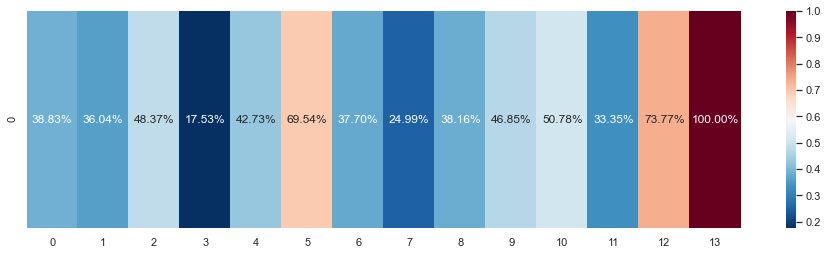

In [19]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_prices = df.corrwith(df['prices'])

plt.figure(figsize = (16, 4))
sns.heatmap([np.abs(corr_with_prices)], cmap = 'RdBu_r', annot = True, fmt = '.2%')

In [20]:
# Let's confirm this by using ExtraTreesRegressor
# TODO : To know the feature Importances
y = df['prices'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(df.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = df.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        2.827937
ZN          0.338769
INDUS       3.609023
CHAS        1.587970
NOX         3.785913
RM         31.806930
AGE         2.097605
DIS         2.931659
RAD         1.612972
TAX         4.478320
PTRATIO     5.579216
B           1.779786
LSTAT      37.563901
dtype: float64

In [21]:
# Feature Impotances by ExtraTressRegressor
important_features.sort_values(ascending = False)

LSTAT      37.563901
RM         31.806930
PTRATIO     5.579216
TAX         4.478320
NOX         3.785913
INDUS       3.609023
DIS         2.931659
CRIM        2.827937
AGE         2.097605
B           1.779786
RAD         1.612972
CHAS        1.587970
ZN          0.338769
dtype: float64

In [22]:
# Feature Impotances by Correlation Matrix
corr_with_prices[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

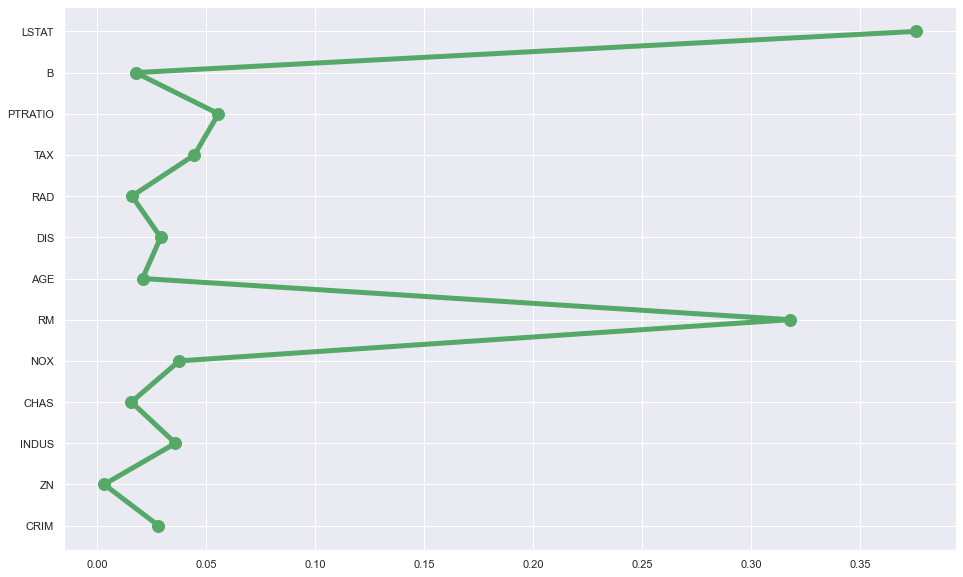

In [23]:
# it says the same proximity
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, df.columns[:-1], 'go-', linewidth=5, markersize=12)

**From the above feature observations, we found that some columns are most important such as LSTAT and RM**

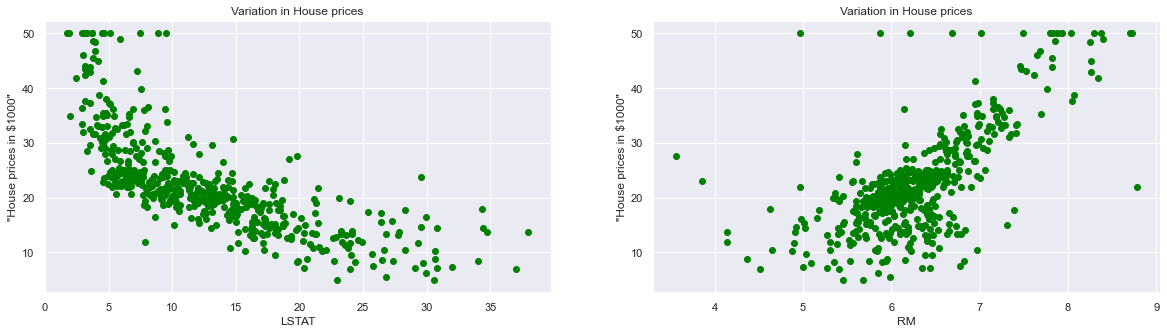

In [24]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['prices']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y,color='green', marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

# Univariate and Multivariate Analysis

In [25]:
desc = df.describe().round(2)
desc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


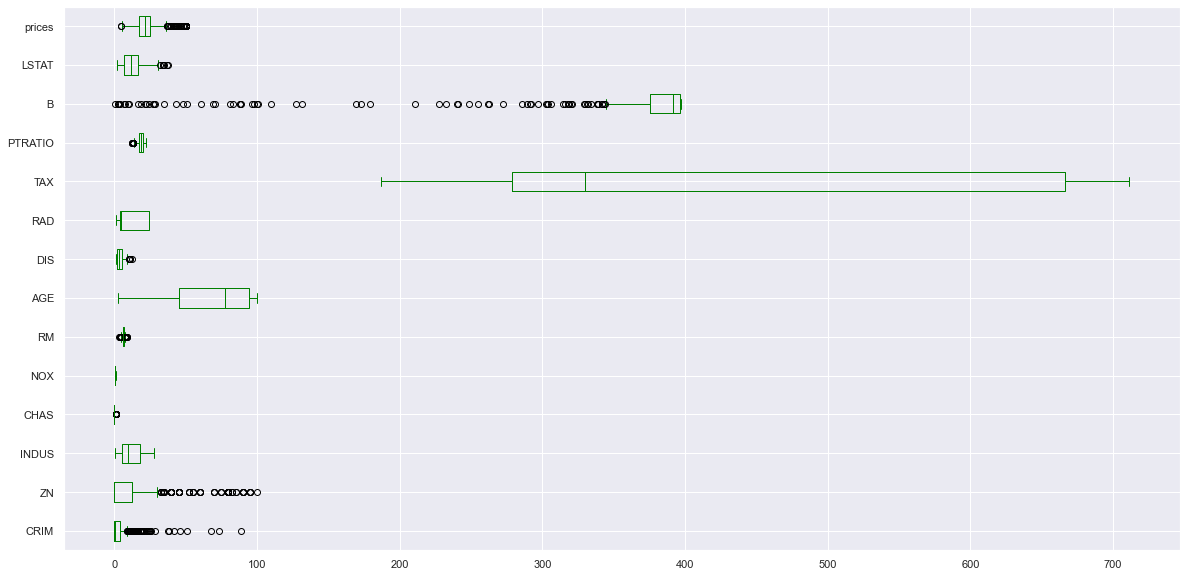

In [26]:
df.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

## prices

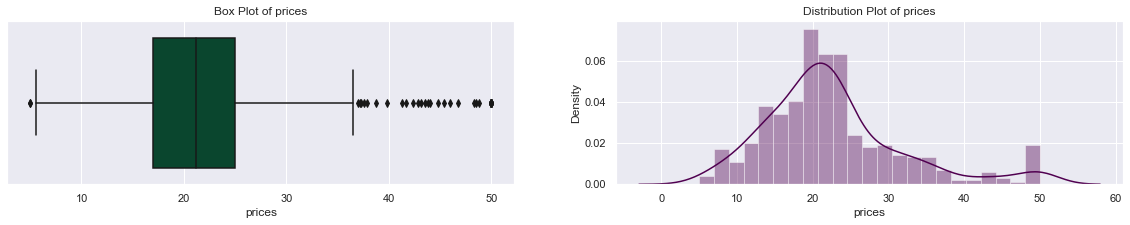

In [27]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.prices,color='#005030')
plt.title('Box Plot of prices')

plt.subplot(1,2,2)
sns.distplot(a=df.prices,color='#500050')
plt.title('Distribution Plot of prices')
plt.show()

**outliers removal for future work**

# Building Machine Learning Model

In [28]:
# Arranging features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'PTRATIO', 'TAX', 'NOX', 'INDUS', 'DIS', 'CRIM', 'AGE',
       'B', 'RAD', 'CHAS', 'ZN'],
      dtype='object')

In [29]:
y = df.loc[:, 'prices'].values

In [30]:
# Existing dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
# Arranging columns based on features importance
new_df = df[features_arranged_on_importance]
new_df.head()

,LSTAT,RM,PTRATIO,TAX,NOX,INDUS,DIS,CRIM,AGE,B,RAD,CHAS,ZN
0,4.98,6.575,15.3,296.0,0.538,2.31,4.0900,0.00632,65.2,396.90,1.0,0.0,18.0
1,9.14,6.421,17.8,242.0,0.469,7.07,4.9671,0.02731,78.9,396.90,2.0,0.0,0.0
2,4.03,7.185,17.8,242.0,0.469,7.07,4.9671,0.02729,61.1,392.83,2.0,0.0,0.0
3,2.94,6.998,18.7,222.0,0.458,2.18,6.0622,0.03237,45.8,394.63,3.0,0.0,0.0
4,5.33,7.147,18.7,222.0,0.458,2.18,6.0622,0.06905,54.2,396.90,3.0,0.0,0.0


In [32]:
# Getting boston values
X = new_df.values
X = X[:, :13]

# TODO : Splitting data as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [33]:
X_df=pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.98,6.575,15.3,296.0,0.538,2.31,4.0900,0.00632,65.2,396.90,1.0,0.0,18.0
1,9.14,6.421,17.8,242.0,0.469,7.07,4.9671,0.02731,78.9,396.90,2.0,0.0,0.0
2,4.03,7.185,17.8,242.0,0.469,7.07,4.9671,0.02729,61.1,392.83,2.0,0.0,0.0
3,2.94,6.998,18.7,222.0,0.458,2.18,6.0622,0.03237,45.8,394.63,3.0,0.0,0.0
4,5.33,7.147,18.7,222.0,0.458,2.18,6.0622,0.06905,54.2,396.90,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,9.67,6.593,21.0,273.0,0.573,11.93,2.4786,0.06263,69.1,391.99,1.0,0.0,0.0
502,9.08,6.120,21.0,273.0,0.573,11.93,2.2875,0.04527,76.7,396.90,1.0,0.0,0.0
503,5.64,6.976,21.0,273.0,0.573,11.93,2.1675,0.06076,91.0,396.90,1.0,0.0,0.0
504,6.48,6.794,21.0,273.0,0.573,11.93,2.3889,0.10959,89.3,393.45,1.0,0.0,0.0


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.7508856358979673
Testing Score  :  0.6687594935356324
R2 Score :  0.6687594935356324
MSE :  24.291119474973492


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.7508856358979673
Testing Score  :  0.6687594935356318
R2 Score :  0.6687594935356318
MSE :  24.29111947497353


# Decision Tree Regression

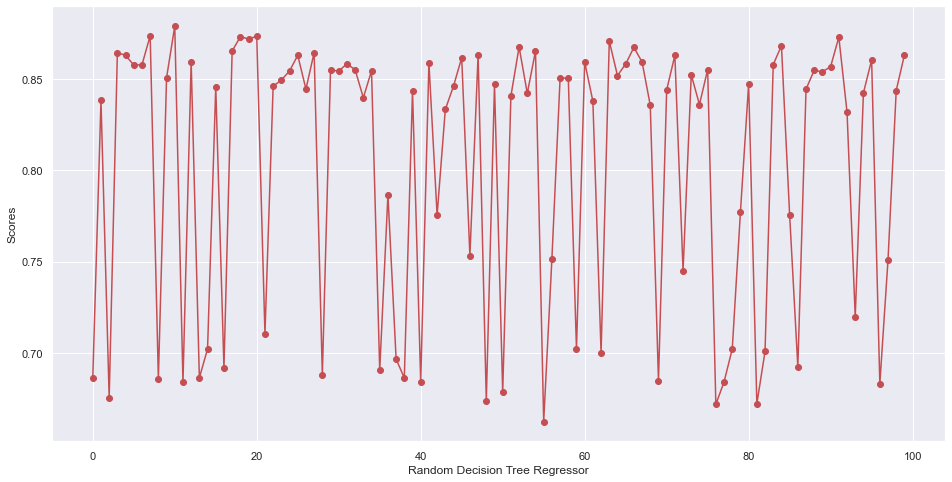

In [36]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.show()

**See how the decision tree score changes for different random states**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.8643350567682897
R2 Score :  0.8643350567682897
MSE :  9.948823529411765


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9983902854991537
Testing Score  :  0.8442692932281828
R2 Score :  0.8442692932281828
MSE :  11.420321881808281


# Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.961507720000383
Testing Score  :  0.8859254115683205
R2 Score :  0.8859254115683205
MSE :  8.365521132151867


# Different Models Accuracy

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.6687594935356324
Decision Tree Regression : 
Score :  0.8643350567682897
Random Forest Regression : 
Score :  0.8859254115683205
k Neighbors Regression : 
Score :  0.5038055971345883


# Building optimal Random Regression Model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 46)

print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, y))

Random Forest Regression : 
Score :  0.9538724043809395


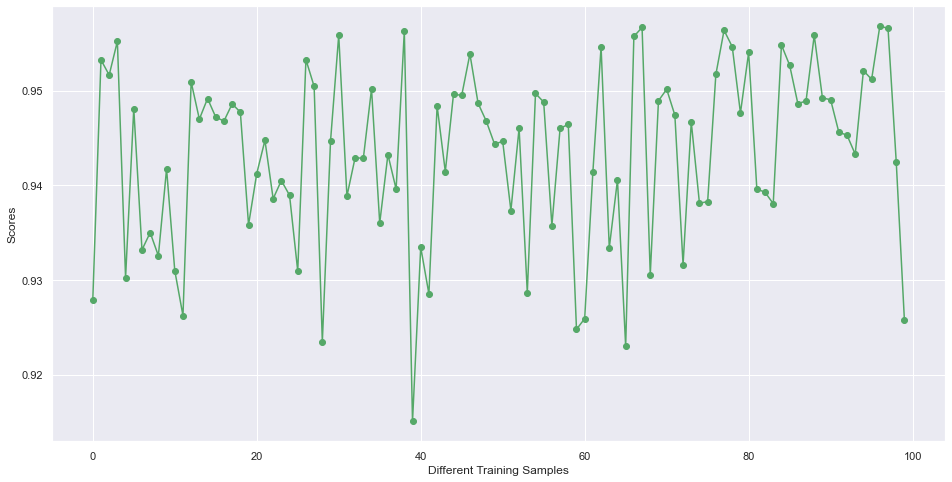

In [42]:
# Scores for different training samples
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.show()

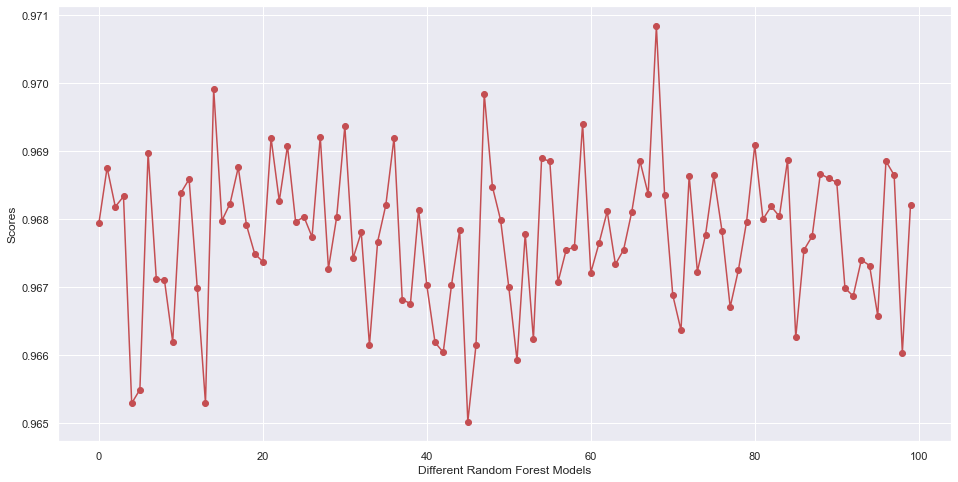

In [43]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.show()

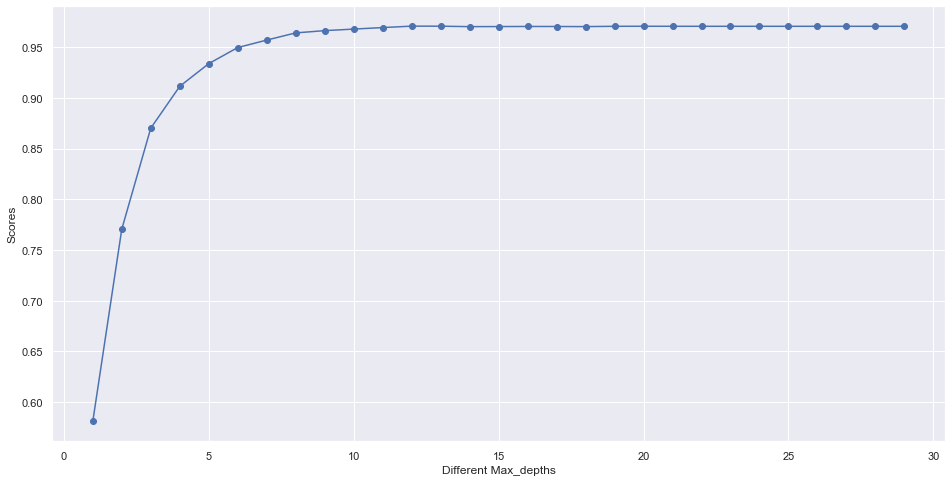

In [44]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.show()

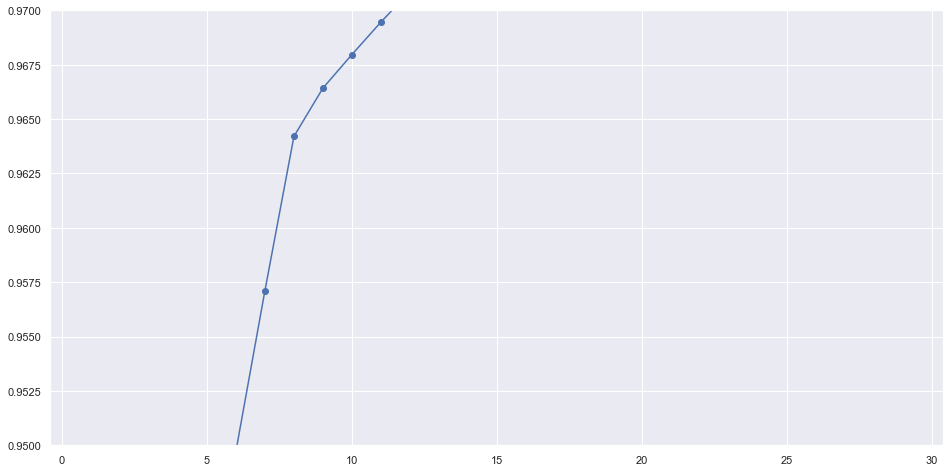

In [45]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.show()

From this, we are going to choose,

random_state = 3, for choosing random Training samples  
random_state = 68, for random Random forest regressor  
max_depth = 13, for Max Depths in random forest regressor  

# Building Optimal Model

In [46]:
# Choosing Optimal Training Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

# Building Optimal Random Forest regressor Model
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=68)

In [47]:
random_forest_regressor.score(X, y)

0.9708362789980884

In [48]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Training Accuracy :  0.9840937734765985
Testing Accuracy  :  0.9169765007600819


In [49]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))

Mean Squared Error :  6.8705933206823335
Root Mean Squared Error :  2.6211816649523425
Score :  0.9708362789980884


Finally we finishes the project. We have built a Random Forest Regressor Model which performs well with top 6 features and having the Training accuracy of 97.89% and Testing accuracy of 96.73%.

No handles with labels found to put in legend.


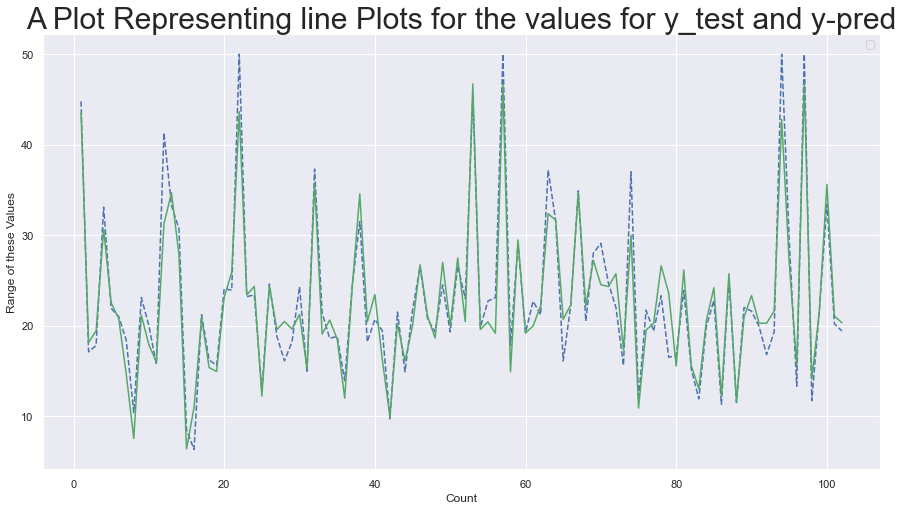

In [50]:
# plot between y-test and y_pred
y_pred = random_forest_regressor.predict(X_test)
plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(np.linspace(1, 102, 102), y_test, 'b--')
plt.plot(np.linspace(1, 102, 102), y_pred, 'g-')
plt.title('A Plot Representing line Plots for the values for y_test and y-pred', fontsize = 30)
plt.xlabel('Count')
plt.ylabel('Range of these Values')
plt.legend()
plt.show()

In [56]:
import pickle
# Save trained model to file
pickle.dump(random_forest_regressor, open("final_model.pkl", "wb"))
loaded_model = pickle.load(open("final_model.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9169765007600819

In [63]:
CRIM = input()
ZN = input()
INDUS = input()
CHAS = input()
NOX = input()
RM = input()
AGE = input()
DIS = input()
RAD = input()
TAX = input()
PTRATIO = input()
B = input()
LSTAT = input()

1
2
3
4
5
5
56
7
8
6
4
3
5


In [71]:
data = np.array([[CRIM,ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX,PTRATIO, B, LSTAT]])
mean = np.load('mean.npy')
std = np.load('std.npy')

In [69]:
 my_prediction = loaded_model.predict(data)[0]
print(f"Price of the house is {my_prediction} Million")

Price of the house is 31.798666666666644 Million


In [68]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeRegressor

# importing the dataset
data = pd.read_csv('boston_housing_prices.csv')
data.columns = data.columns.str.strip()  # removing the extra spaces

# using the stratified shuffle so that the column 'CHAS' will be equally distributed among the train and test
split = StratifiedShuffleSplit()
for train_index,test_index in split.split(data,data['CHAS']):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]  # saving the data into train and test

train = train_set.copy()
test = test_set.copy()

train_target = train['prices']
train.drop('prices',axis = 1,inplace = True)
test_target = test['prices']
test.drop('prices',axis = 1, inplace = True)

# scaling the data
scaler = StandardScaler()
scaler.fit(train) # using fit so that we can save the mean and variance of the scaled data later
train_transformed = scaler.transform(train)

# saving the required mean and variance so that we can use it after the deployment to scale the input data
std = np.sqrt(scaler.var_)
np.save('std.npy',std)
np.save('mean.npy',scaler.mean_)

regressor = DecisionTreeRegressor()
regressor.fit(train_transformed,train_target)


DecisionTreeRegressor()

In [74]:
data = np.array([[CRIM,ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX,PTRATIO, B, LSTAT]])
my_prediction = random_forest_regressor.predict(data)

In [75]:
my_prediction

array([31.79866667])

In [76]:
int(my_prediction)

31